In [1]:
import cv2
import matplotlib.pyplot as plt
from pspnet_segmentation import PSPNetSematicSegmentation
import numpy as np
from helpers import load_images_from_folder
import time

In [2]:
seg = PSPNetSematicSegmentation()

[2021-08-08 17:40:05,280 INFO pspnet_segmentation.py line 62 21] => loading checkpoint 'semseg/exp/ade20k/pspnet50/model/train_epoch_100.pth'
[2021-08-08 17:40:05,280 INFO pspnet_segmentation.py line 62 21] => loading checkpoint 'semseg/exp/ade20k/pspnet50/model/train_epoch_100.pth'
[2021-08-08 17:40:05,452 INFO pspnet_segmentation.py line 65 21] => loaded checkpoint 'semseg/exp/ade20k/pspnet50/model/train_epoch_100.pth'
[2021-08-08 17:40:05,452 INFO pspnet_segmentation.py line 65 21] => loaded checkpoint 'semseg/exp/ade20k/pspnet50/model/train_epoch_100.pth'
[2021-08-08 17:40:05,452 INFO pspnet_segmentation.py line 65 21] => loaded checkpoint 'semseg/exp/ade20k/pspnet50/model/train_epoch_100.pth'


In [7]:
print(decoded_drivable.shape)
print(img.shape)

print(decoded_drivable.dtype)
print(img.dtype)

(480, 270, 3)
(270, 480, 3)
uint8
uint8


[  0   3   5  12  14  17  22  27  82 100]
avg time: 2.3904879093170166


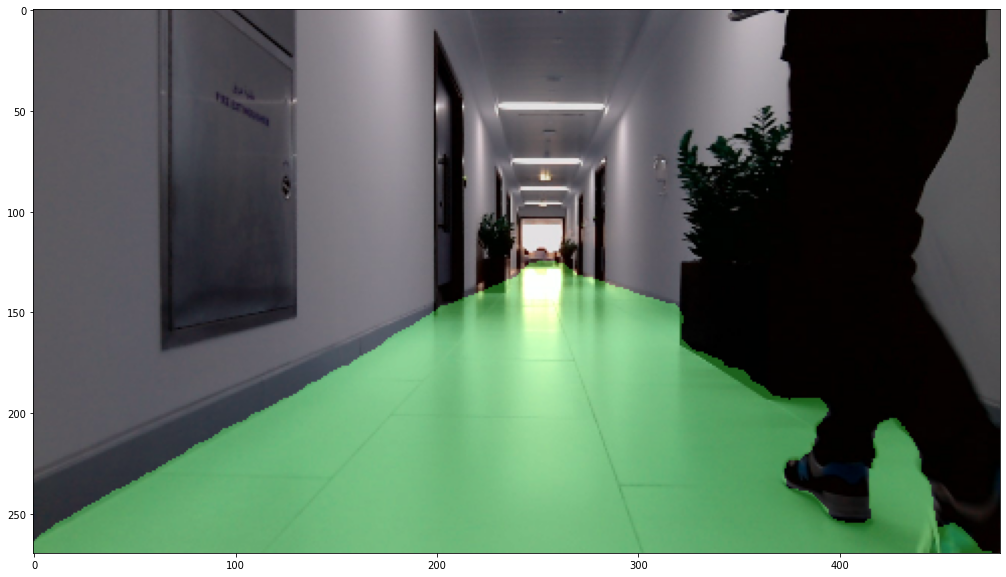

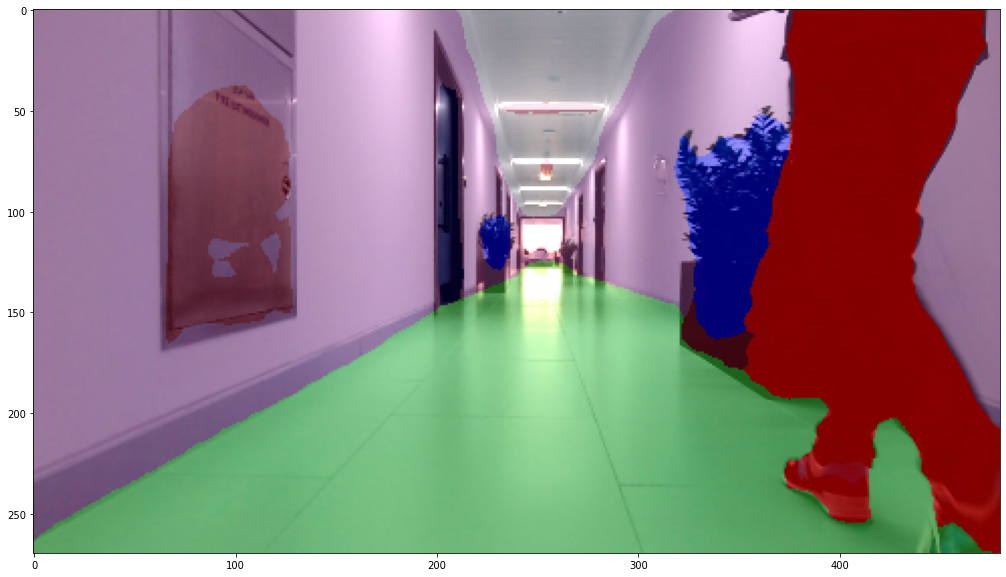

In [8]:
img = cv2.imread("./data/jackal_cam/jackal_cam_indoors1/left0494.jpg")
img = cv2.resize(img, (480, 270), interpolation=cv2.INTER_LINEAR)

start = time.time()
decoded_img, decoded_drivable = seg.process_img_driveable(img, [270, 480] )
end = time.time()
print('avg time: {}'.format(end-start))

decoded_drivable = cv2.addWeighted(img, 1.0, decoded_drivable, 0.5, 0)  
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(decoded_drivable)
plt.show()

decoded_img = cv2.addWeighted(img, 1.0, decoded_img, 0.5, 0)  
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(decoded_img)
plt.show()

In [9]:
imgs, filenames = load_images_from_folder('./data/jackal_cam/jackal_cam_indoors1')
print('processing {} images'.format(len(imgs)))
i=0

start = time.time()

for img, filename in zip(imgs, filenames):
    print('===============File: {} ============'.format(filename))
    img = cv2.resize(img, (480, 270), interpolation=cv2.INTER_LINEAR)
    decoded_img, decoded_drivable = seg.process_img_driveable(img, [270, 480] )
    decoded_img = cv2.addWeighted(img, 1.0, decoded_img, 0.5, 0)  
    cv2.imwrite('./output/{}'.format(filename), decoded_img)
    i = i+1
end = time.time()
print('avg time: {}'.format((end-start)/len(imgs)))

processing 341 images
===============File: left0055.jpg ============
[  0   3   5  14  17  43  82 125]
===============File: left0467.jpg ============
[  0   3   5  12  14  17  22  27  28  82  98 125]
===============File: left0663.jpg ============
[ 0  3  5  8 10 14 17 19 82]
===============File: left0063.jpg ============
[  0   3   5  14  17  43  82 125]
===============File: left0255.jpg ============
[  0   3   5  14  17  82 125]
===============File: left0645.jpg ============
[  0   3   5   8  10  14  17  19  22  27  45  82 125]
===============File: left0105.jpg ============
[  0   3   5  14  17  43  82 125]
===============File: left0189.jpg ============
[  0   3   5  14  15  17  22  82 125 134]
===============File: left0073.jpg ============
[  0   3   5  14  17  43  82 125]
===============File: left0061.jpg ============
[  0   3   5  14  17  43  82 125]
===============File: left0311.jpg ============
[ 0  3  5 10 14 17 82]
===============File: left0419.jpg ============
[  0   3   5   8